## Financial analysis: Portfolio management

#### Importing necessary libries

In [1]:
import sys
import os

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import sidetable as stb
import mplfinance as mpf
from scipy.stats import zscore

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# sns.set_theme(style='whitegrid')

In [2]:
sys.path.append(os.path.abspath('../scripts'))
from plotting import Plots
from utils import Utils

plots = Plots()

#### Extract historical financial data using YFinance

##### Tesla

In [3]:
# data for tesla, Vanguard Total Bond Market ETF and S&p 500
tsla, bnd, sp500 = Utils.get_price_data()

2024-11-08 13:35 - INFO :: Fetching data took 2.98s


#### Data cleaning and Understanding

In [13]:
# Tesla
tsla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02 00:00:00-05:00,14.858000,14.883333,14.217333,14.620667,71466000
2015-01-05 00:00:00-05:00,14.303333,14.433333,13.810667,14.006000,80527500
2015-01-06 00:00:00-05:00,14.004000,14.280000,13.614000,14.085333,93928500
2015-01-07 00:00:00-05:00,14.223333,14.318667,13.985333,14.063333,44526000
2015-01-08 00:00:00-05:00,14.187333,14.253333,14.000667,14.041333,51637500


In [5]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2015-01-02 00:00:00-05:00 to 2024-10-30 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2474 non-null   float64
 1   High          2474 non-null   float64
 2   Low           2474 non-null   float64
 3   Close         2474 non-null   float64
 4   Volume        2474 non-null   int64  
 5   Dividends     2474 non-null   float64
 6   Stock Splits  2474 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 154.6 KB


In [4]:
tsla.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
Dividends,2474,1,0.000000e+00,2474,0.000000e+00,2474
Stock Splits,2474,3,0.000000e+00,2472,5.000000e+00,1
High,2474,2356,2.030667e+01,3,1.450667e+01,1
Open,2474,2360,2.400000e+01,4,1.361133e+01,1
Low,2474,2376,1.433333e+01,4,1.343333e+01,1
Close,2474,2421,1.400600e+01,3,2.616300e+02,1
Volume,2474,2464,6.137100e+07,2,6.676160e+07,1


**Observation**
- As we can see Dividends and stock splits have a zero value. Therefore we need to drop them

In [4]:
tsla.drop(['Dividends', 'Stock Splits'], axis=1,inplace=True)

##### Vanguard Total Bond Market ETF

In [7]:
bnd.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2015-01-02 00:00:00-05:00,63.190106,63.389421,63.182438,63.358757,2218800,0.0,0.0,0.0
2015-01-05 00:00:00-05:00,63.427742,63.565729,63.397078,63.542732,5820100,0.0,0.0,0.0
2015-01-06 00:00:00-05:00,63.650091,63.918397,63.650091,63.726749,3887600,0.0,0.0,0.0
2015-01-07 00:00:00-05:00,63.734400,63.841722,63.665409,63.765064,2433400,0.0,0.0,0.0
2015-01-08 00:00:00-05:00,63.711368,63.711368,63.604046,63.665375,1873400,0.0,0.0,0.0


In [8]:
bnd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2015-01-02 00:00:00-05:00 to 2024-10-30 00:00:00-04:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           2474 non-null   float64
 1   High           2474 non-null   float64
 2   Low            2474 non-null   float64
 3   Close          2474 non-null   float64
 4   Volume         2474 non-null   int64  
 5   Dividends      2474 non-null   float64
 6   Stock Splits   2474 non-null   float64
 7   Capital Gains  2474 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 174.0 KB


In [9]:
bnd.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
Stock Splits,2474,1,0.000000e+00,2474,0.000000e+00,2474
Capital Gains,2474,1,0.000000e+00,2474,0.000000e+00,2474
Dividends,2474,72,0.000000e+00,2358,1.700000e-01,1
Close,2474,2249,6.348314e+01,5,6.363972e+01,1
Volume,2474,2429,1.827800e+06,3,2.433400e+06,1
Low,2474,2456,6.386813e+01,3,7.356967e+01,1
High,2474,2462,7.502511e+01,2,6.398735e+01,1
Open,2474,2468,6.636291e+01,2,7.304131e+01,1


**Observation**
- As we can see Dividends and stock splits have a zero value. Therefore we need to drop them

In [5]:
bnd.drop(['Dividends', 'Stock Splits'], axis=1,inplace=True)

##### S&P 500

In [11]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2015-01-02 00:00:00-05:00,173.974626,174.396117,172.120055,173.173782,121465900,0.0,0.0,0.0
2015-01-05 00:00:00-05:00,172.111583,172.280176,169.734381,170.046280,169632600,0.0,0.0,0.0
2015-01-06 00:00:00-05:00,170.358232,170.889314,167.635403,168.444672,209151400,0.0,0.0,0.0
2015-01-07 00:00:00-05:00,169.793448,170.889327,169.338243,170.543701,125346700,0.0,0.0,0.0
2015-01-08 00:00:00-05:00,171.976757,173.789176,171.959906,173.569992,147217800,0.0,0.0,0.0


In [12]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2015-01-02 00:00:00-05:00 to 2024-10-30 00:00:00-04:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           2474 non-null   float64
 1   High           2474 non-null   float64
 2   Low            2474 non-null   float64
 3   Close          2474 non-null   float64
 4   Volume         2474 non-null   int64  
 5   Dividends      2474 non-null   float64
 6   Stock Splits   2474 non-null   float64
 7   Capital Gains  2474 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 174.0 KB


In [13]:
sp500.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
Stock Splits,2474,1,0.000000e+00,2474,0.000000e+00,2474
Capital Gains,2474,1,0.000000e+00,2474,0.000000e+00,2474
Dividends,2474,38,0.000000e+00,2435,9.310000e-01,1
Close,2474,2434,2.077291e+02,2,5.737600e+02,1
High,2474,2472,2.866318e+02,2,1.724741e+02,1
Volume,2474,2472,6.993620e+07,2,1.443961e+08,1
Low,2474,2473,5.681000e+02,2,1.673909e+02,1
Open,2474,2473,5.704200e+02,2,1.683013e+02,1


**Observation**
- As we can see Dividends, stock splits, Capital Gains have a zero value. Therefore we need to drop them

In [6]:
sp500.drop(['Dividends', 'Stock Splits', 'Capital Gains'], axis=1,inplace=True)

### Exploratory Data Analysis

#### Visualize the closing price over time

##### Plots for Tesla stock

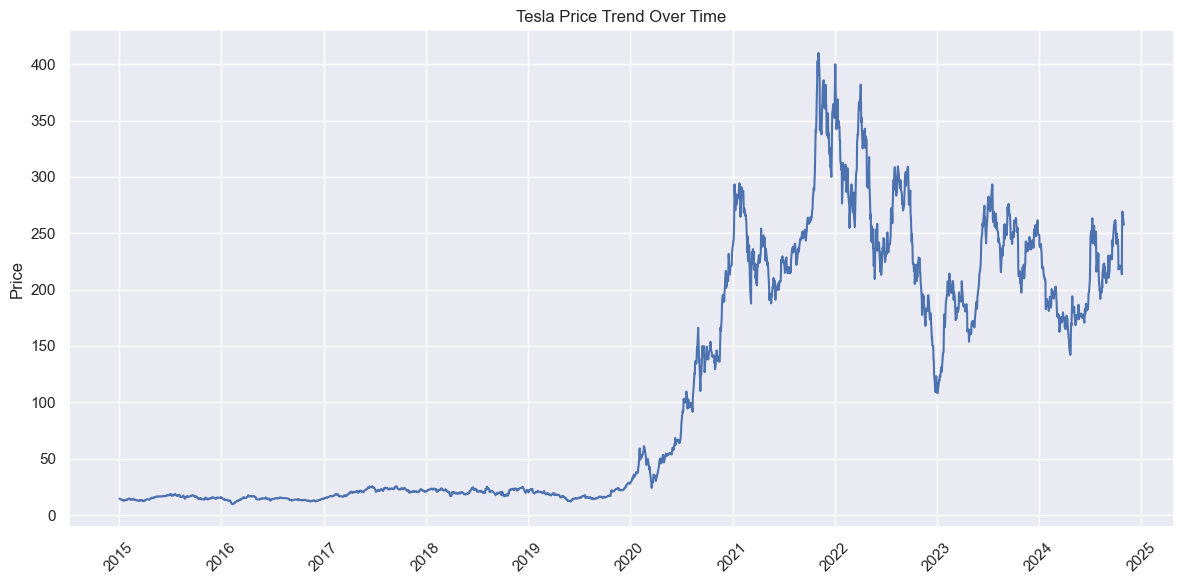

In [7]:
plots.plot_data(tsla, "Tesla", "Close")

**Observation**
- The above plot is to showing the price change for each day for the past 10 years

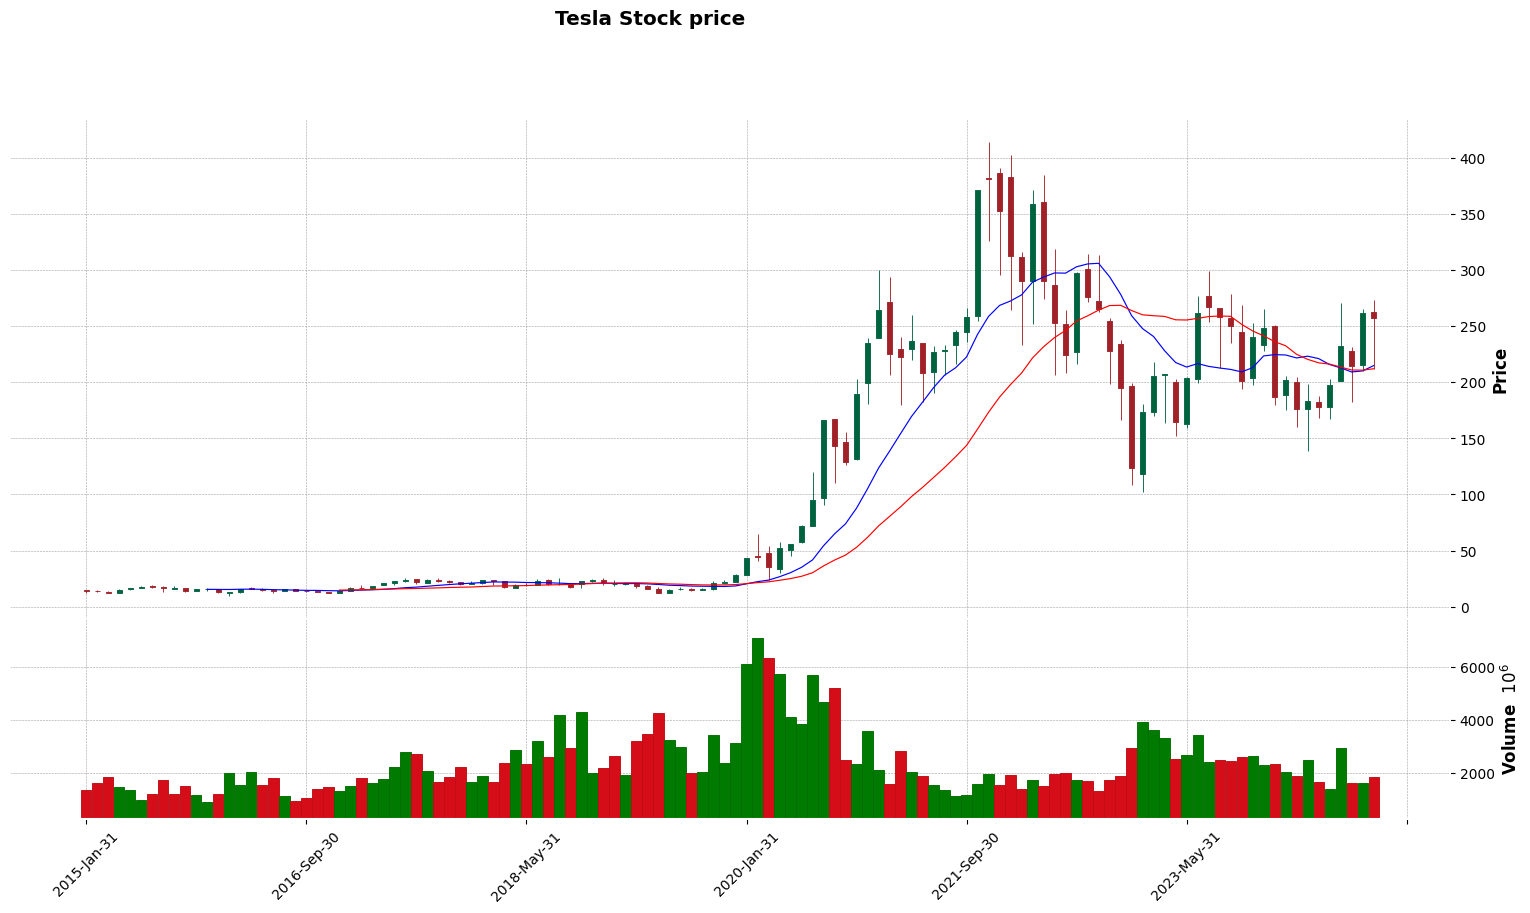

In [10]:
# Tesla
# Change tesla daily price to monthly data
tsla_month = Utils.resample_timeframe(tsla, '1ME')
mpf.plot(tsla_month, type='candle', figsize=(20, 10), style='charles', volume=True, mav=(12, 24), mavcolors=('blue', 'red'), title="Tesla Stock price")

**Observation**
- The above plot show Tesla stock with 12 and 24 moving average lines. 

**Insigts:**
- Overall Trend: The chart shows a significant upward trend in Tesla's stock price over the period depicted.
- Volatility: The stock appears to be quite volatile, with periods of sharp price increases and decreases.
- Volume: High volume periods often coincide with significant price movements, suggesting increased investor interest and potential volatility. After 2020, the volume of Tesla stock increased.

##### Plots for Vanguard Total Bond Market ETF

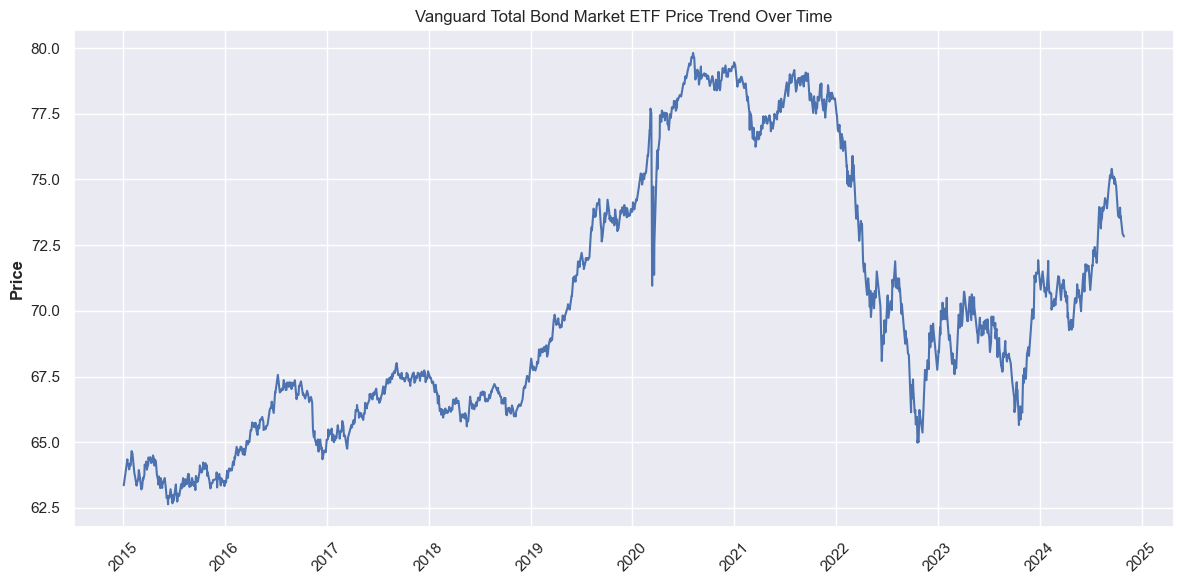

In [ ]:
plots.plot_data(bnd, "Vanguard Total Bond Market ETF", "Close")

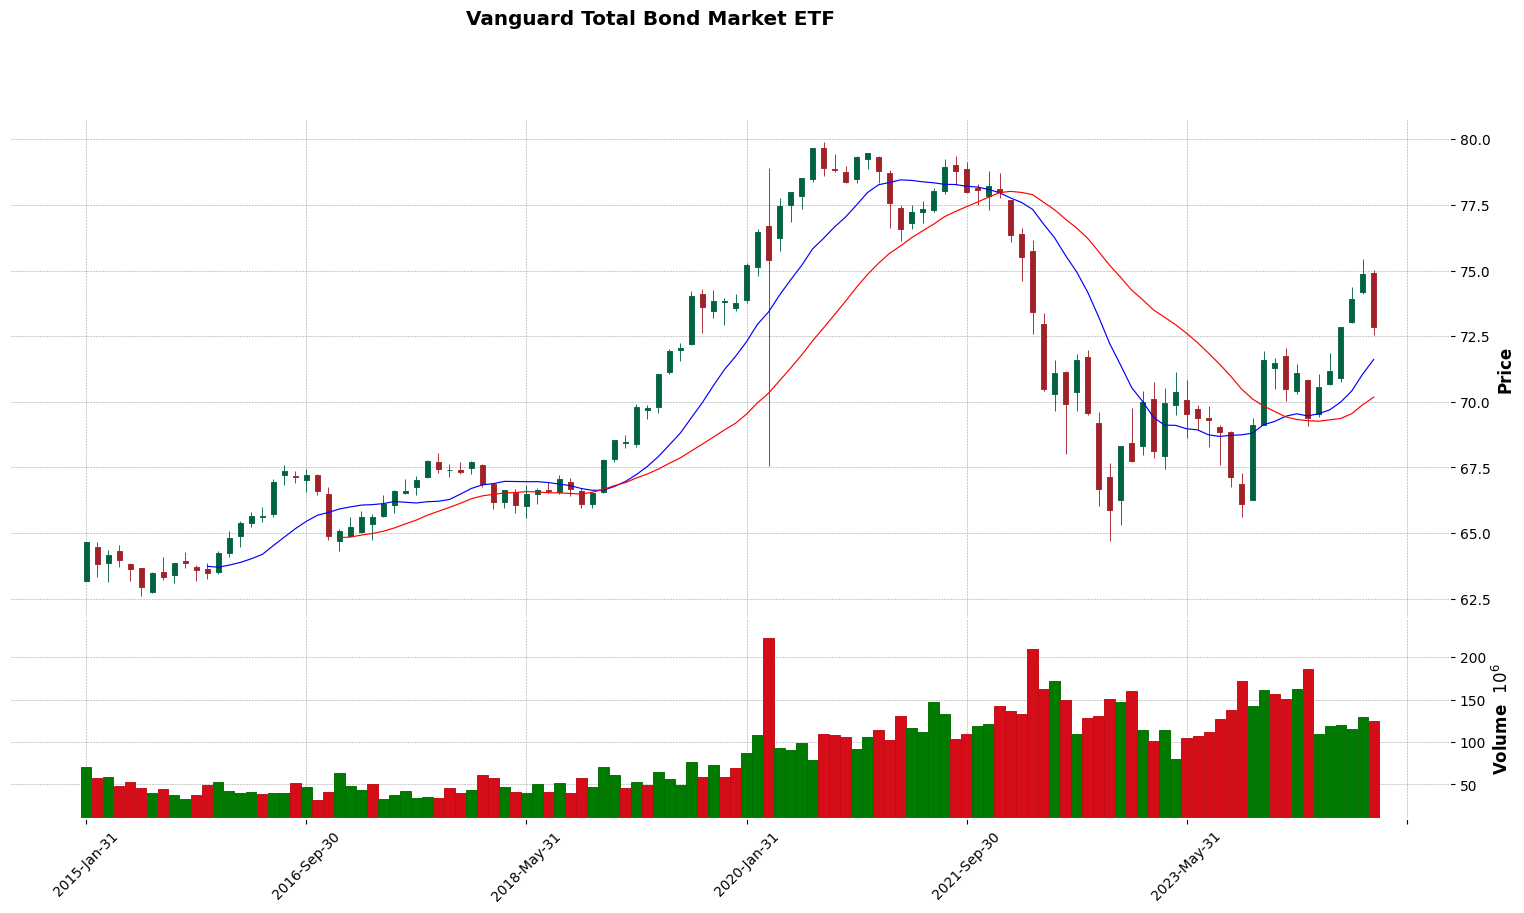

In [ ]:
# Vanguard Total Bond Market ETF
# Change tesla daily price to monthly data
bnd_month = Utils.resample_timeframe(bnd, '1ME')
mpf.plot(bnd_month, type='candle', figsize=(20, 10), style='charles', volume=True, mav=(12, 24), mavcolors=('blue', 'red'), title="Vanguard Total Bond Market ETF")

**Observation:**
- Overall Trend: The chart shows a general upward trend in the ETF's price over the period depicted. Price reached its peak in 2021, and after that the price has been consolidating. 
- Volatility: The price has experienced periods of significant volatility, particularly during certain time periods.
- Moving Averages: Moving averages are utilized to detect possible trend shifts. The red line represents a 24-period moving average, while the blue line represents a 12-period moving average.
- Volume: The volume chart shows periods of high trading activity, which may coincide with significant price movements. The general trend for the volume shows that the volume traded has been increasing.

##### Plots for S&P500

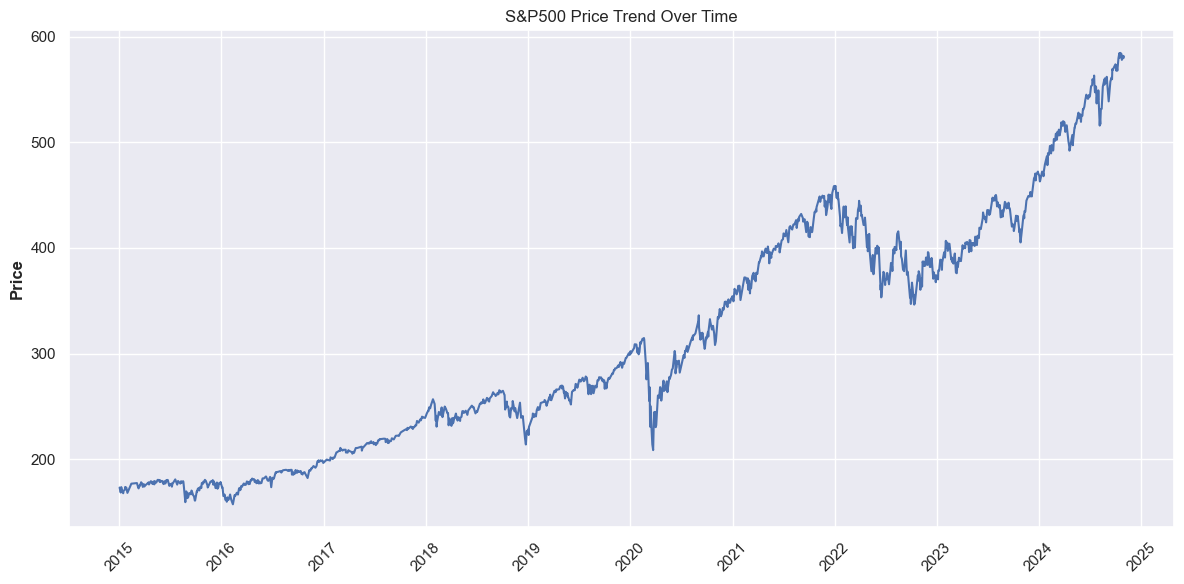

In [ ]:
plots.plot_data(sp500, "S&P500", "Close")

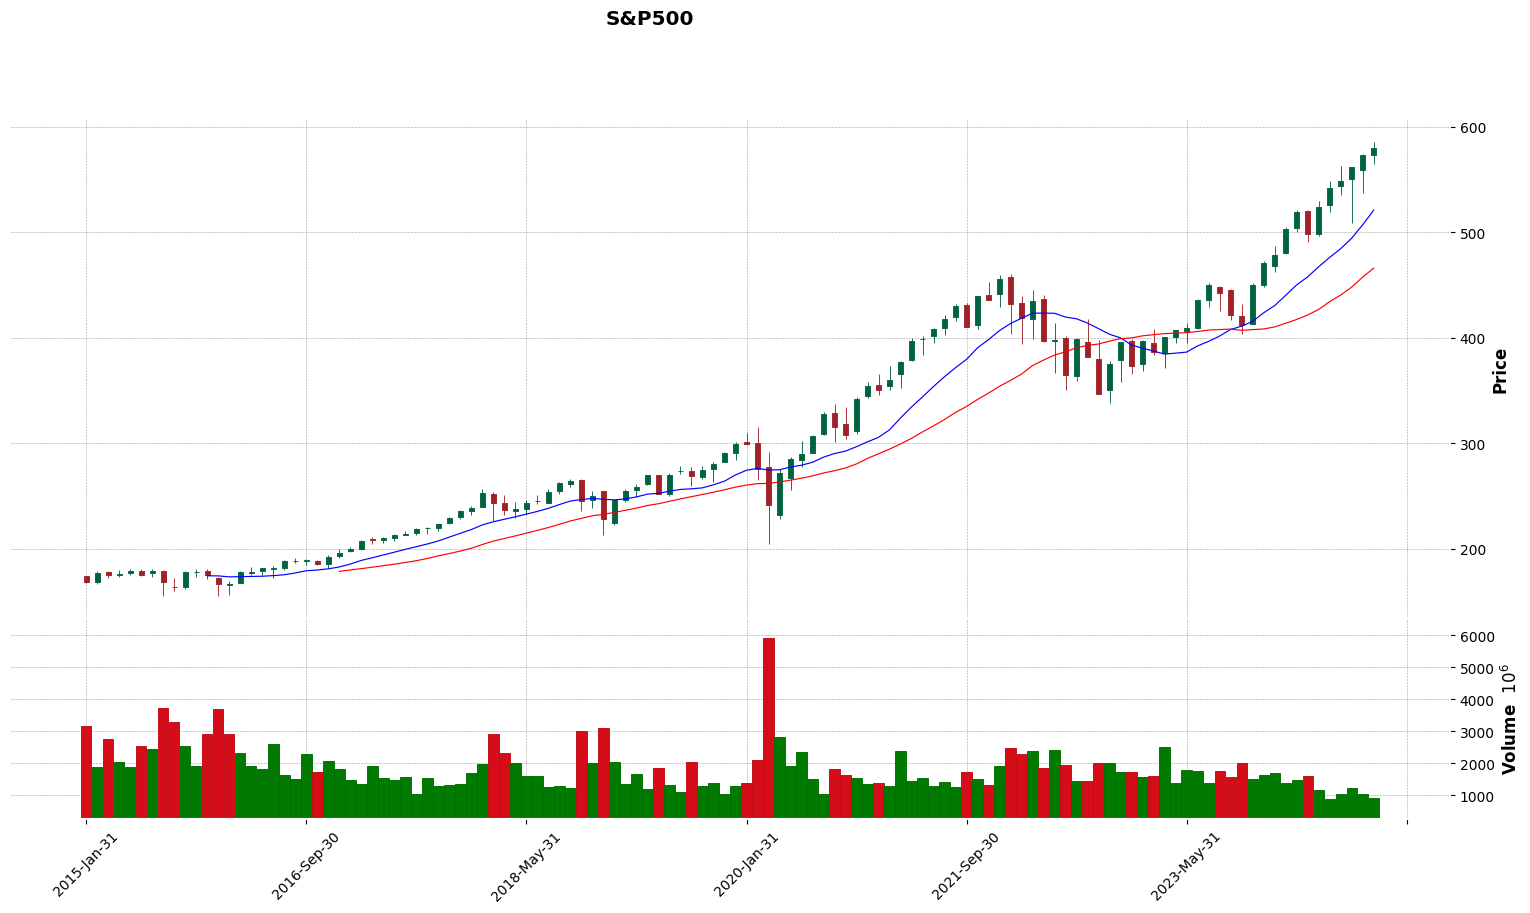

In [17]:
# S&P500
# Change tesla daily price to monthly data
bnd_month = Utils.resample_timeframe(sp500, '1ME')
mpf.plot(bnd_month, type='candle', figsize=(20, 10), style='charles', volume=True, mav=(12, 24), mavcolors=('blue', 'red'), title="S&P500")

**Observation**
- Overall Trend: The chart shows a significant upward trend in the S&P 500 ETF over the period depicted.
- Moving Averages: The moving averages have been used to identify potential trend changes, and mostly the trend has been upward.

### Daily percentage change

In [9]:
tsla['Daily pct Change'] = tsla['Close'].pct_change() * 100
bnd['Daily pct Change'] = bnd['Close'].pct_change() * 100
sp500['Daily pct Change'] = sp500['Close'].pct_change() * 100

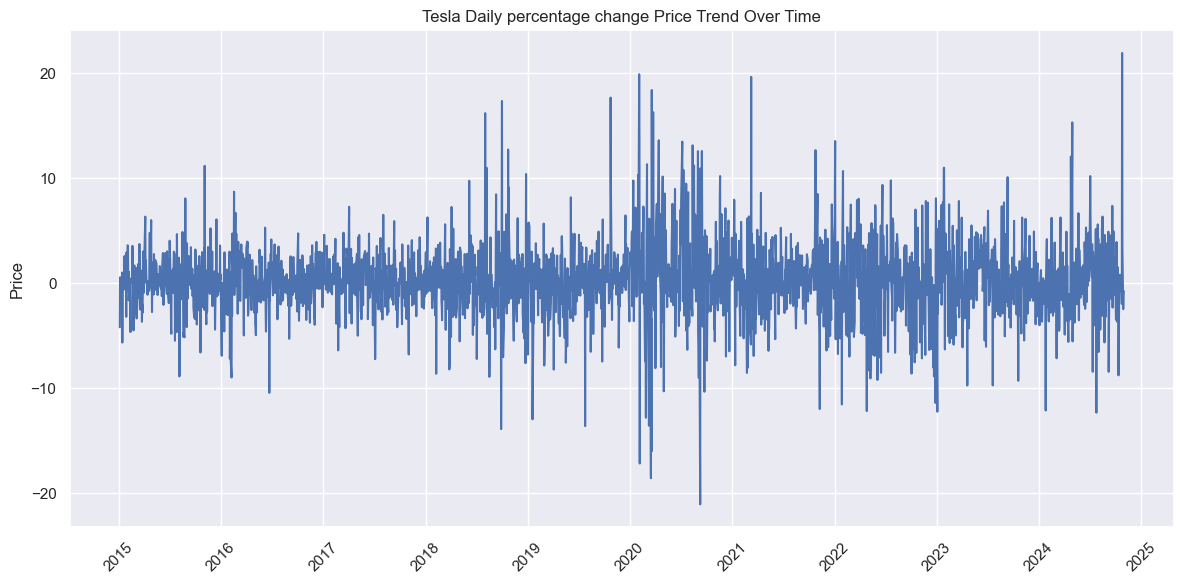

In [13]:
plots.plot_data(tsla, "Tesla Daily percentage change", "Daily pct Change")

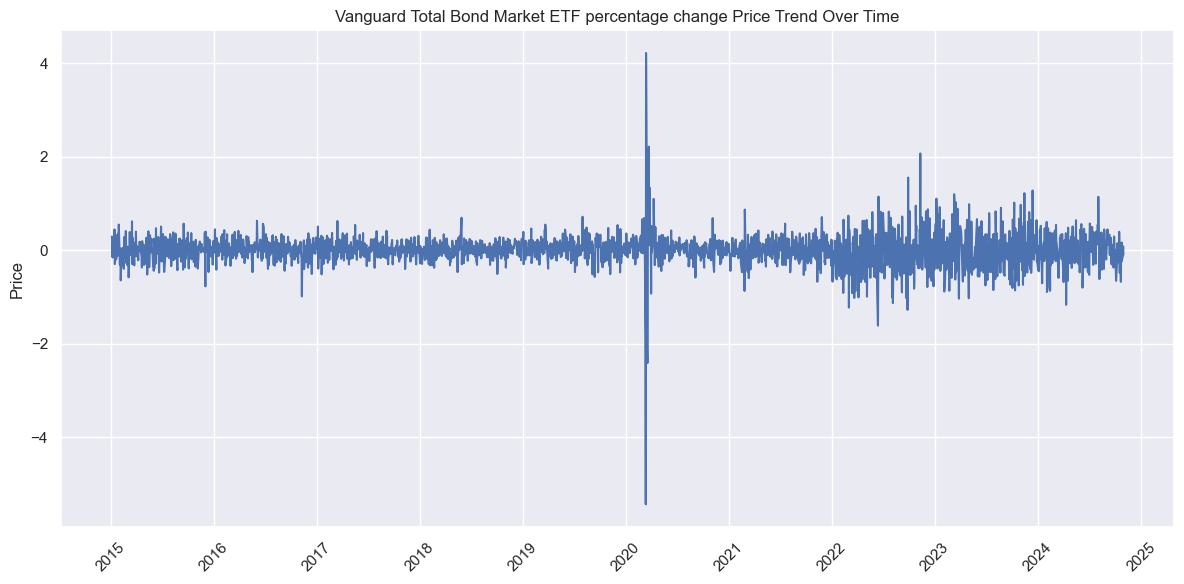

In [14]:
plots.plot_data(bnd, "Vanguard Total Bond Market ETF percentage change", "Daily pct Change")

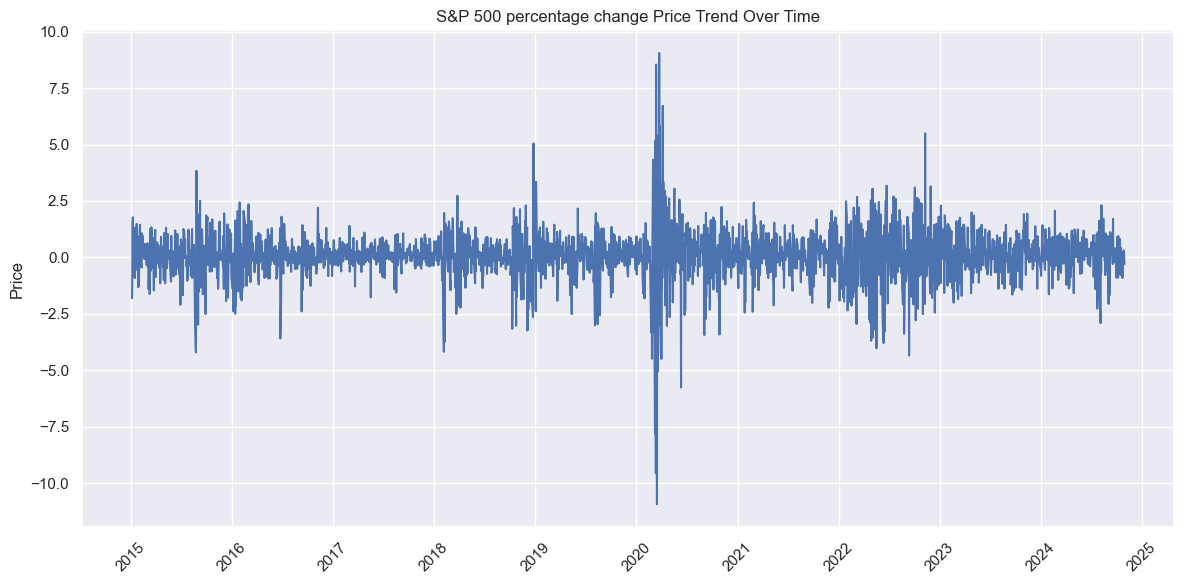

In [16]:
plots.plot_data(sp500, "S&P 500 percentage change", "Daily pct Change")

#####  Unusually high or low returns

In [10]:
tsla.bfill(inplace=True)
bnd.bfill(inplace=True)
sp500.bfill(inplace=True)

tsla['Z-score Returns'] = zscore(tsla['Daily pct Change'])
bnd['Z-score Returns'] = zscore(bnd['Daily pct Change'])
sp500['Z-score Returns'] = zscore(sp500['Daily pct Change'])

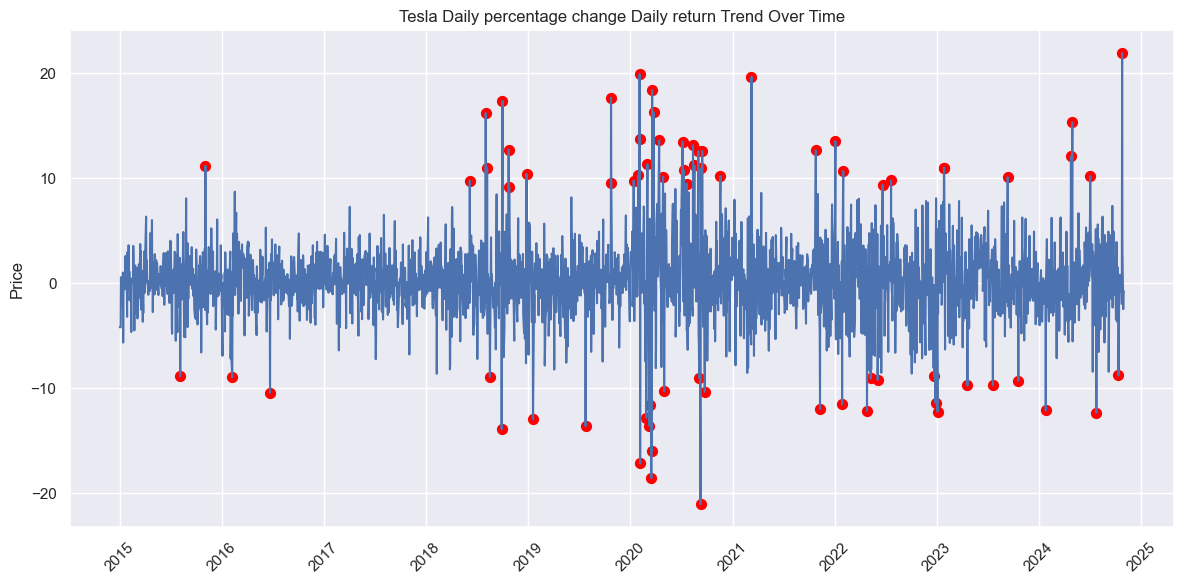

In [14]:
plots.plot_data(tsla, "Tesla Daily percentage change", "Daily pct Change", True)

**Key Observations:**
- Volatility: The chart shows that Tesla's stock price has exhibited significant volatility, with periods of sharp increases and decreases. This is characteristic of high-growth stocks, which often experience large price swings.
- Z-Score Outliers: The red dots indicate data points that are considered outliers based on their Z-scores. A Z-score measures how many standard deviations a data point is from the mean. In this case, data points with Z-scores greater than 2.5 or less than -2.5 are highlighted. These points represent unusual or extreme price movements.

**Insights and Implications:**
- Risk and Reward: Tesla's high volatility implies both significant potential rewards and risks. Investors should be prepared for large price swings.

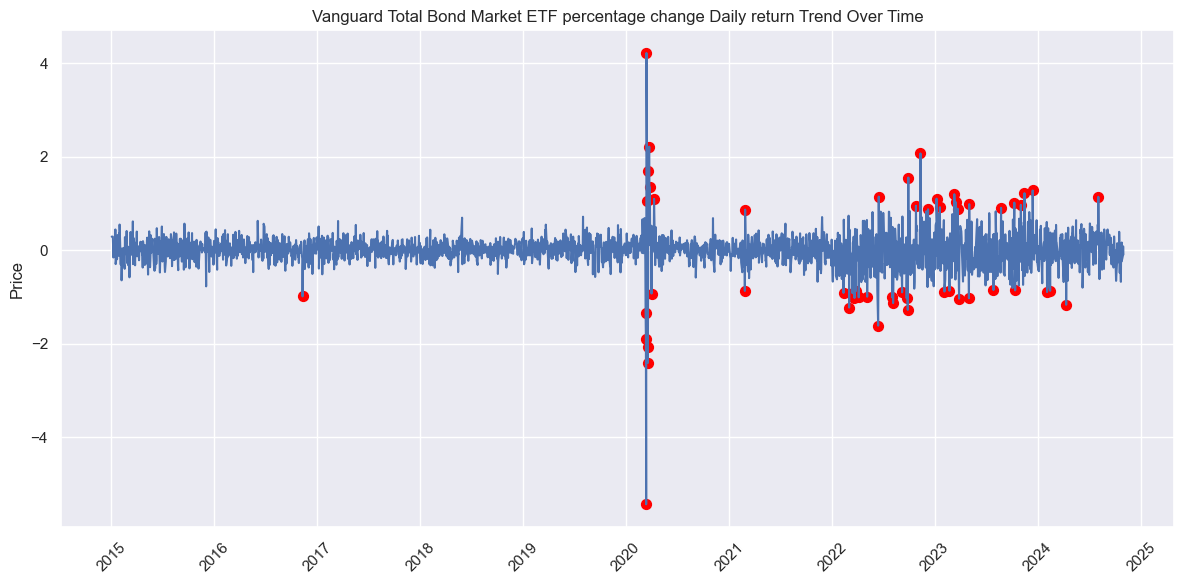

In [13]:
plots.plot_data(bnd, "Vanguard Total Bond Market ETF percentage change", "Daily pct Change" ,True)

**Key Observations:**
- Volatility: Unlike the Tesla chart, the BND exhibits much lower volatility. This is expected for a bond ETF, which is generally considered a more stable investment.
- Z-Score Outliers: The red dots indicate significant positive or negative changes in the daily return. These outliers might be associated with specific events, such as interest rate changes, economic news, or geopolitical factors.
- Overall Trend: While the chart doesn't explicitly show a clear trend, there are periods of positive and negative returns, reflecting the cyclical nature of the bond market.

**Insights and implications:**
- Lower Volatility: The lower volatility of BND compared to Tesla makes it a less risky investment. However, it also means lower potential returns.

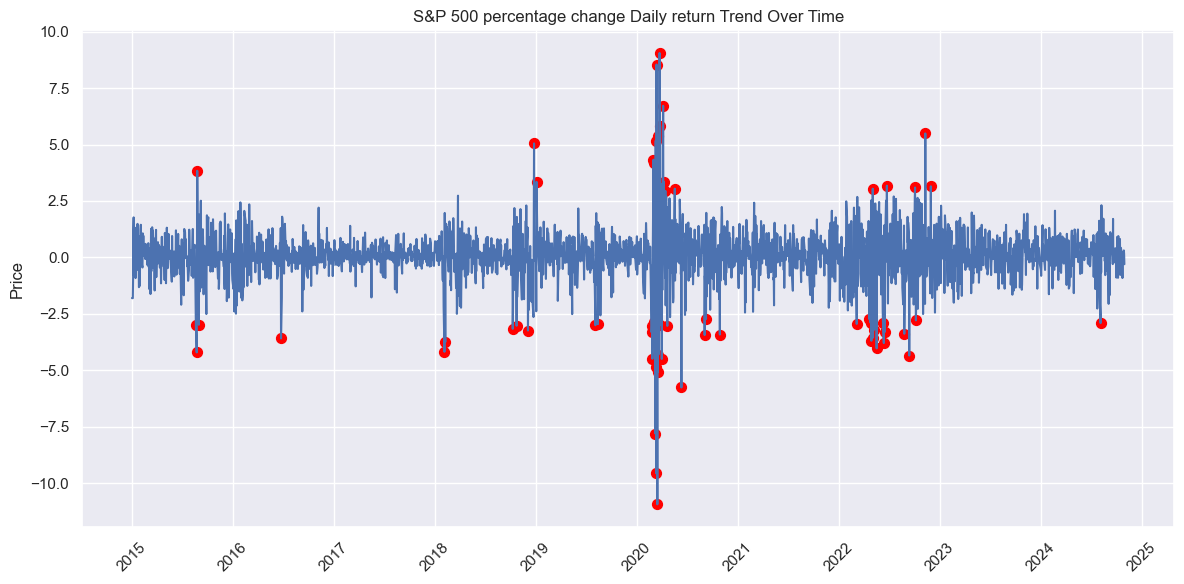

In [11]:
plots.plot_data(sp500, "S&P 500 percentage change", "Daily pct Change", True)

**Key Observations:**
- Volatility: The S&P 500, as a broad market index, exhibits significant volatility with periods of sharp increases and decreases.
- Z-Score Outliers: The red dots indicate data points that are considered outliers, representing unusually large positive or negative daily returns. These outliers might be associated with specific events, such as economic news, geopolitical events, or corporate earnings announcements.
- Overall Trend: While the chart doesn't explicitly show a long-term trend, it's clear that the S&P 500 has experienced periods of both significant gains and losses.

#### Seasonality and Trends

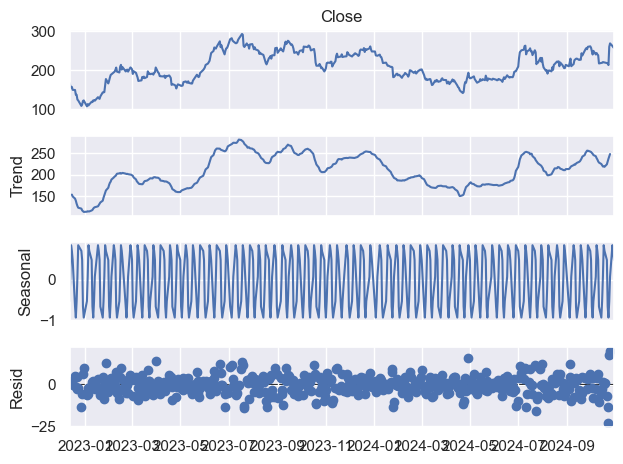

In [ ]:
# Tesla
plots.plot_seasonal_decompose(2000, 7, tsla)

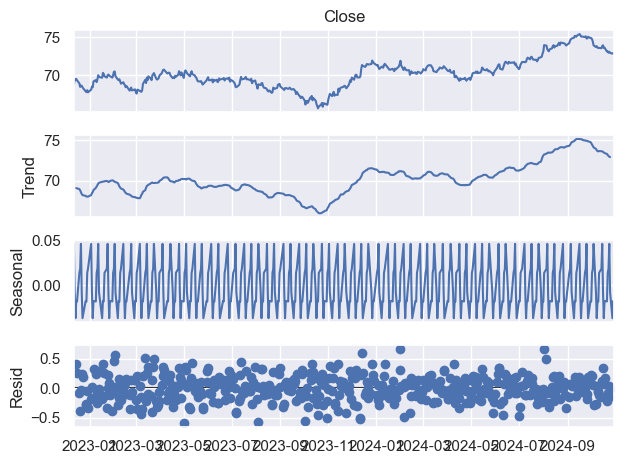

In [ ]:
# Vanguard Total Bond Market ETF percentage chang
plots.plot_seasonal_decompose(2000, 7, bnd)

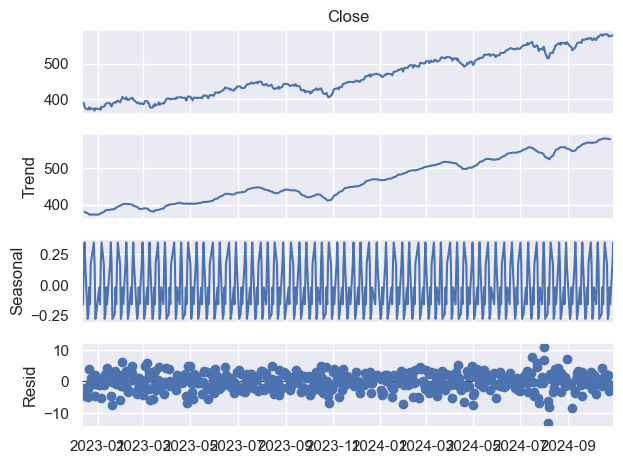

In [17]:
# S&P 500
plots.plot_seasonal_decompose(2000, 7, sp500)

#### Analyze Volatility

##### Tesla Stock

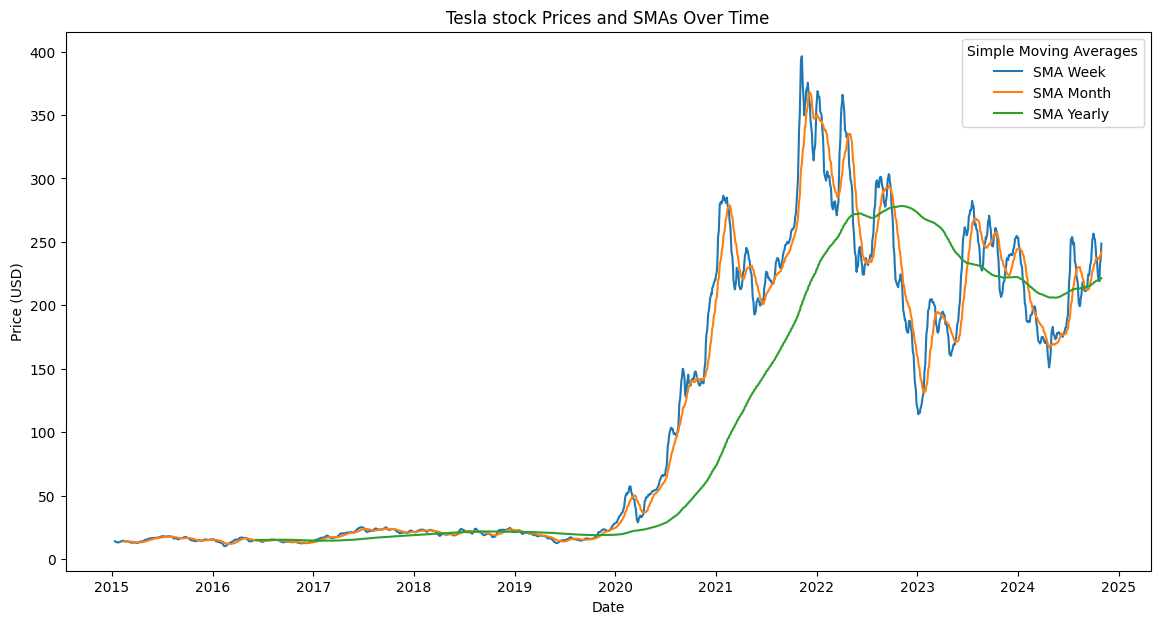

In [9]:
plots.plot_volatility(tsla, True, 'Tesla stock')

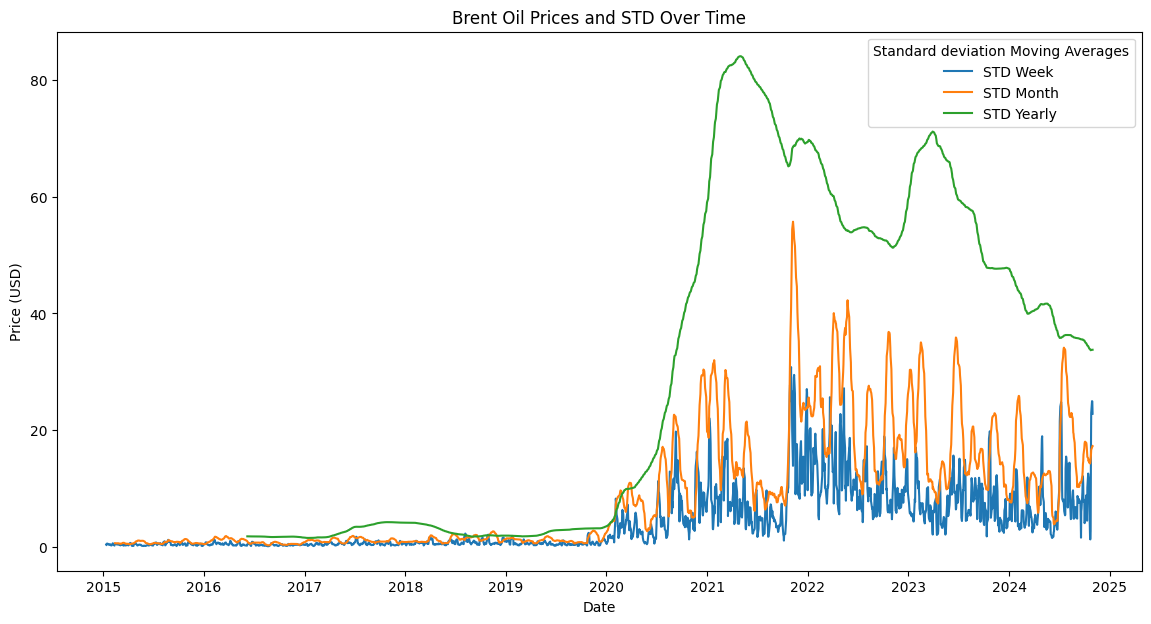

In [ ]:
plots.plot_volatility(tsla, False, 'Tesla stock')

##### Vanguard Total Bond Market ETF

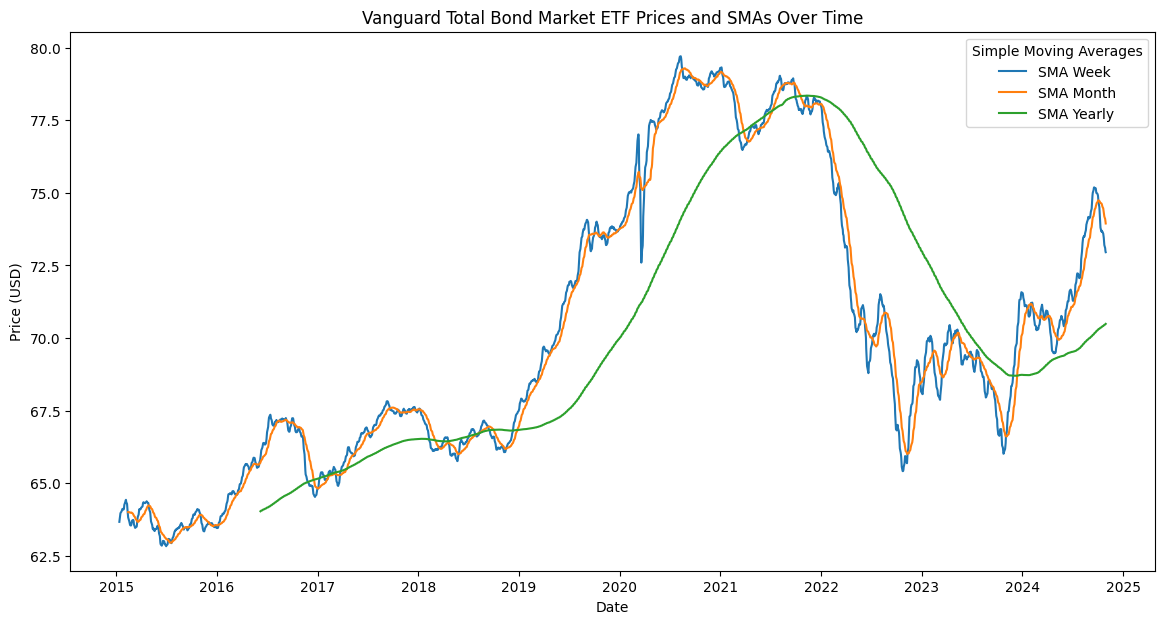

In [10]:
plots.plot_volatility(bnd, True, 'Vanguard Total Bond Market ETF')

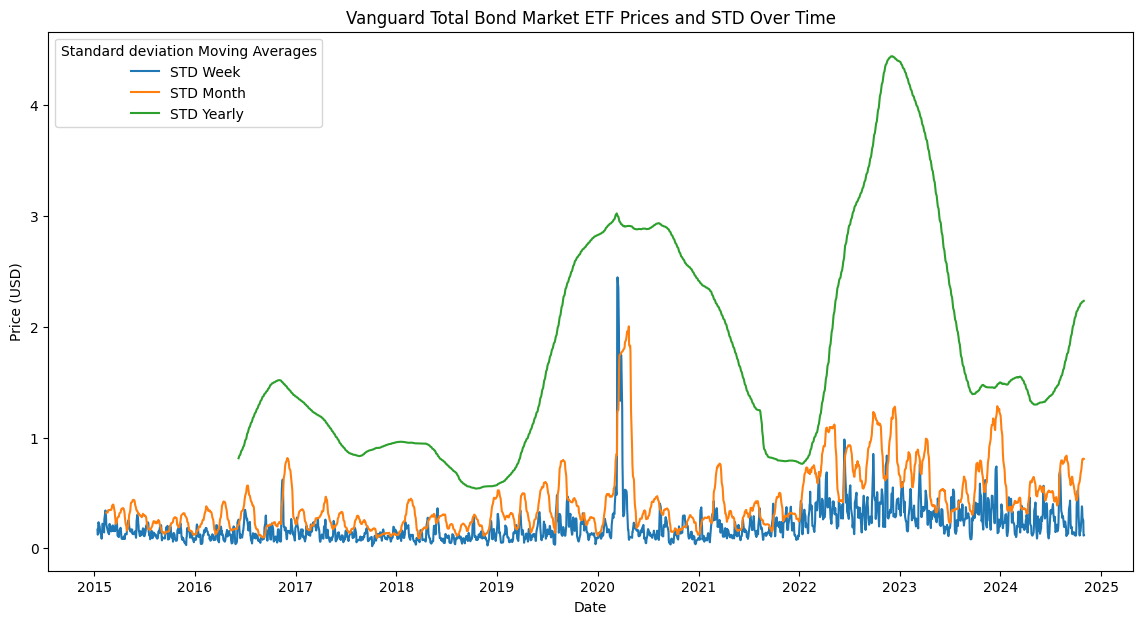

In [11]:
plots.plot_volatility(bnd, False, 'Vanguard Total Bond Market ETF')

##### S&P 500

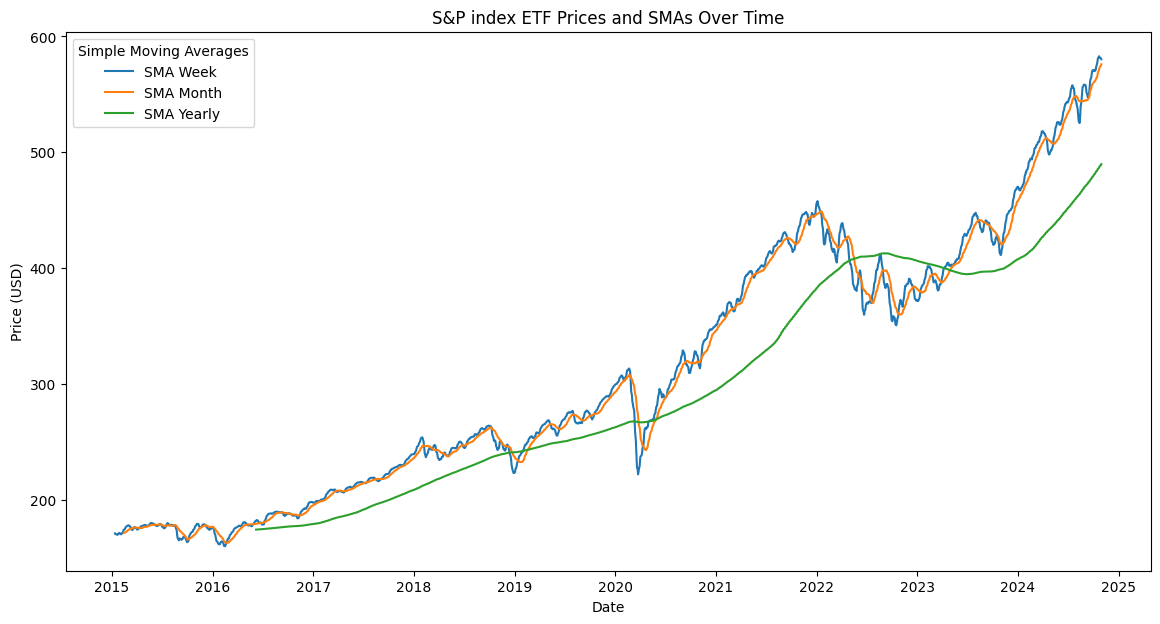

In [14]:
plots.plot_volatility(sp500, True, 'S&P index ETF')

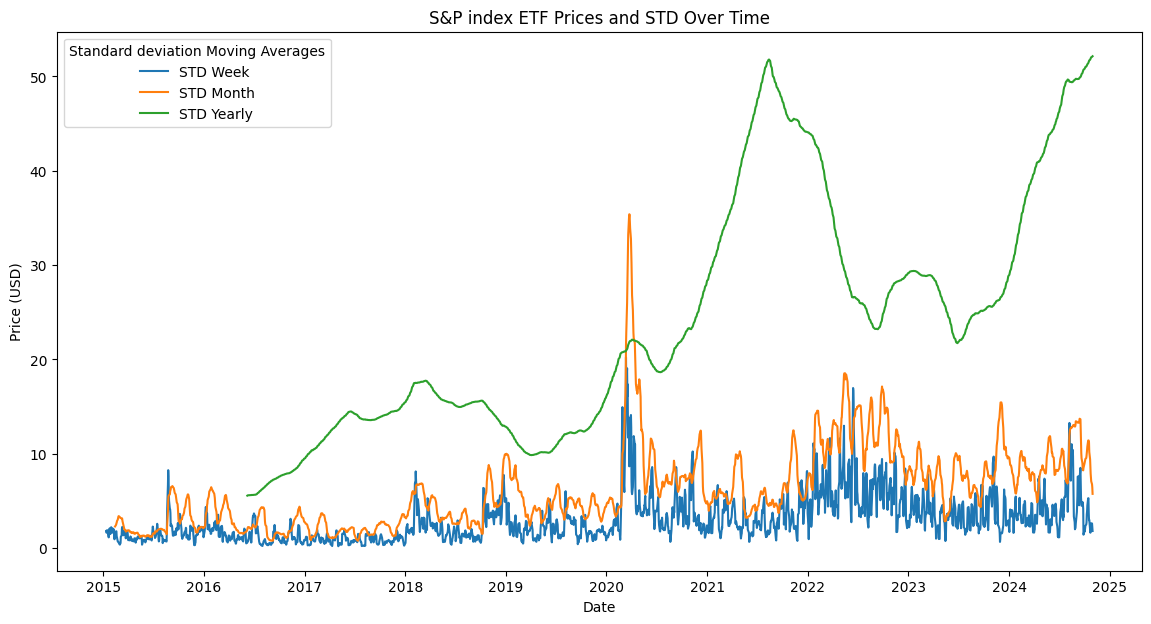

In [15]:
plots.plot_volatility(sp500, False, 'S&P index ETF')